In [32]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.utils import make_grid

# Helper libraries
import time
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [3]:
BATCH_SIZE = 64
dataset_path = 'mask_dataset'

In [15]:
def save_model(epochs, model, optimizer, criterion):
    """
    Function to save the trained model to disk.
    """
    torch.save({
                'epoch': epochs,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, 'outputs/model.pth')
                
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('outputs/accuracy.png')
    
    # loss plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('outputs/loss.png')

In [29]:
# the training transforms
train_transform = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.CenterCrop(20),
    # transforms.Resize(224),
    transforms.ToTensor()
])

# transforms.Compose([
#     transforms.CenterCrop(20),
#     transforms.Resize(224),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.RandomRotation(degrees=(30, 70)),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         mean=[0.5, 0.5, 0.5],
#         std=[0.5, 0.5, 0.5]
#     )
# ])

# the validation transforms
valid_transform = transforms.Compose([
    transforms.CenterCrop(20),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [30]:
print("Loading images")

# Create datasets
train_dataset = datasets.ImageFolder(
    root=dataset_path + '/train',
    transform=train_transform
)
valid_dataset = datasets.ImageFolder(
    root=dataset_path + '/validation',
    transform=valid_transform
)

# Create data loader
train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, pin_memory=True
)
# validation data loaders
valid_loader = DataLoader(
    valid_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=4, pin_memory=True
)


Loading images


In [37]:
print(train_loader.batch_size)

64


RuntimeError: stack expects each tensor to be equal size, but got [64, 3, 20, 20] at entry 0 and [64] at entry 1

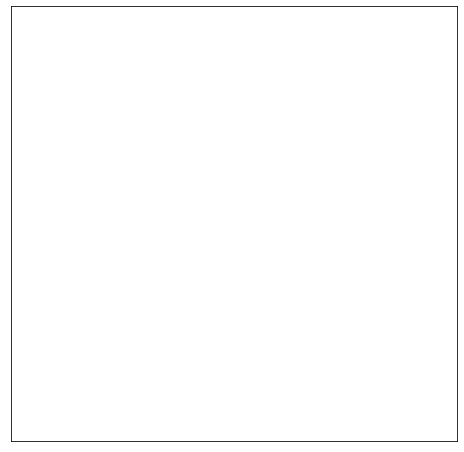

In [39]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break
show_batch(train_loader,16)


0
tensor([[[0.5451, 0.5373, 0.5373,  ..., 0.6745, 0.6706, 0.6706],
         [0.5412, 0.5333, 0.5294,  ..., 0.6745, 0.6706, 0.6706],
         [0.5333, 0.5255, 0.5216,  ..., 0.6745, 0.6706, 0.6706],
         ...,
         [0.6118, 0.6118, 0.6118,  ..., 0.0000, 0.0000, 0.0000],
         [0.6078, 0.6078, 0.6078,  ..., 0.0078, 0.0078, 0.0078],
         [0.6039, 0.6039, 0.6078,  ..., 0.0078, 0.0078, 0.0157]],

        [[0.5765, 0.5686, 0.5686,  ..., 0.7020, 0.6980, 0.6980],
         [0.5725, 0.5647, 0.5608,  ..., 0.7020, 0.6980, 0.6980],
         [0.5647, 0.5569, 0.5529,  ..., 0.7020, 0.6980, 0.6980],
         ...,
         [0.7216, 0.7216, 0.7216,  ..., 0.2863, 0.2863, 0.2863],
         [0.7176, 0.7176, 0.7176,  ..., 0.2824, 0.2824, 0.2824],
         [0.7137, 0.7137, 0.7176,  ..., 0.2745, 0.2745, 0.2706]],

        [[0.5843, 0.5765, 0.5765,  ..., 0.7333, 0.7294, 0.7294],
         [0.5804, 0.5725, 0.5686,  ..., 0.7333, 0.7294, 0.7294],
         [0.5725, 0.5647, 0.5608,  ..., 0.7333, 0.7294, 

TypeError: Invalid shape (3, 1800, 1800) for image data

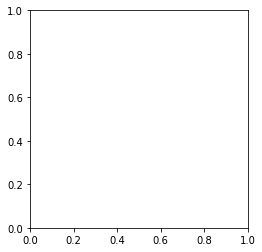

In [15]:
train_transform = transforms.Compose([
    # transforms.C enterCrop(20),
    # transforms.Resize(224),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    # transforms.Normalize(
    #     mean=[0.5, 0.5, 0.5],
    #     std=[0.5, 0.5, 0.5]
    # )
])

# Create datasets
train_dataset = datasets.ImageFolder(
    root=dataset_path + '/train',
    transform=train_transform
)
img, label = train_dataset[10]
print(label)
print(img)
plt.imshow(img)

0


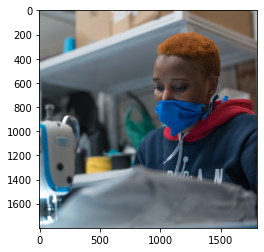

In [5]:

# Create datasets
train_dataset = datasets.ImageFolder(
    root=dataset_path + '/train',
    # transform=train_transform
)
img, label = train_dataset[10]
print(label)
plt.imshow(img)

In [25]:
print("Visualization of the data")

labels_map = {
    0: "No mask",
    1: "Mask",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    print(sample_idx)
    print(train_dataset[sample_idx])
    # img, label = train_dataset[sample_idx]
    # figure.add_subplot(rows, cols, i)
    # plt.title(labels_map[label])
    # plt.axis("off")
    # plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Visualization of the data
567
(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]), 1)
75
(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., 

<Figure size 576x576 with 0 Axes>

In [26]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 5)
        
        self.fc1 = nn.Linear(256, 50)
        
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        bs, _, _, _ = x.shape
        x = F.adaptive_avg_pool2d(x, 1).reshape(bs, -1)
        x = self.fc1(x)
        return x

In [27]:
# learning_parameters 
lr = 1e-3
epochs = 20
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

model = CNNModel().to(device)
print(model)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

# optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# loss function
criterion = nn.CrossEntropyLoss()

Computation device: cpu

CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=50, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
959,858 total parameters.
959,858 training parameters.


In [28]:
# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # backpropagation
        loss.backward()
        # update the optimizer parameters
        optimizer.step()
    
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc
# validation
def validate(model, testloader, criterion):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(image)
            # calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

In [29]:
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
# start the training
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_loader,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)
    time.sleep(5)
    
# save the trained model weights
save_model(epochs, model, optimizer, criterion)
# save the loss and accuracy plots
save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

[INFO]: Epoch 1 of 20
Training


 70%|███████   | 7/10 [01:52<00:48, 16.13s/it]
